In [106]:
import numpy as np
import pandas as pd


In [107]:
df = pd.read_csv('dataset.csv')

In [108]:
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [110]:
df.shape

(114000, 21)

In [111]:
df['track_genre'].value_counts()

acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64

In [112]:
df.drop(df.columns[:4], axis=1, inplace=True)
print("Column names:", df.columns)

Column names: Index(['track_name', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [113]:
df.drop(columns='popularity',axis=1,inplace=True)
df.columns = df.columns.str.strip()

print("Column names after strip:", df.columns)

df.drop(columns='duration_ms',axis=1,inplace=True)

Column names after strip: Index(['track_name', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [114]:
df.head(5)

,track_name,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Comedy,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ghost - Acoustic,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,To Begin Again,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Can't Help Falling In Love,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Hold On,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [115]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()

df['track_name_encoded'] = label_encoder1.fit_transform(df['track_name'])

# Print the original and encoded columns
print("Original track names:")
print(df['track_name'])
print("\nEncoded labels:")
print(df['track_name_encoded'])



Original track names:
0                             Comedy
1                   Ghost - Acoustic
2                     To Begin Again
3         Can't Help Falling In Love
4                            Hold On
                     ...            
113995           Sleep My Little Boy
113996              Water Into Light
113997                Miss Perfumado
113998                       Friends
113999                     Barbincor
Name: track_name, Length: 114000, dtype: object

Encoded labels:
0         11741
1         22528
2         60774
3          9580
4         25689
          ...  
113995    53329
113996    65090
113997    38207
113998    21507
113999     5999
Name: track_name_encoded, Length: 114000, dtype: int32


In [116]:
label_encoder2 = LabelEncoder()

df['explicit_encoded'] = label_encoder2.fit_transform(df['explicit'])

# Print the original and encoded columns
print("Original explicit:")
print(df['explicit'])
print("\nEncoded labels:")
print(df['explicit_encoded'])



Original explicit:
0         False
1         False
2         False
3         False
4         False
          ...  
113995    False
113996    False
113997    False
113998    False
113999    False
Name: explicit, Length: 114000, dtype: bool

Encoded labels:
0         0
1         0
2         0
3         0
4         0
         ..
113995    0
113996    0
113997    0
113998    0
113999    0
Name: explicit_encoded, Length: 114000, dtype: int64


In [117]:
label_encoder3 = LabelEncoder()

df['track_genre_encoded'] = label_encoder3.fit_transform(df['track_genre'])

# Print the original and encoded columns
print("Original track names:")
print(df['track_genre'])
print("\nEncoded labels:")
print(df['track_genre_encoded'])



Original track names:
0            acoustic
1            acoustic
2            acoustic
3            acoustic
4            acoustic
             ...     
113995    world-music
113996    world-music
113997    world-music
113998    world-music
113999    world-music
Name: track_genre, Length: 114000, dtype: object

Encoded labels:
0           0
1           0
2           0
3           0
4           0
         ... 
113995    113
113996    113
113997    113
113998    113
113999    113
Name: track_genre_encoded, Length: 114000, dtype: int32


In [118]:
encoded_data = pd.concat([df, df[['track_name_encoded','explicit_encoded','track_genre_encoded']]], axis=1)
print(encoded_data)

                        track_name  explicit  danceability  energy  key  \
0                           Comedy     False         0.676  0.4610    1   
1                 Ghost - Acoustic     False         0.420  0.1660    1   
2                   To Begin Again     False         0.438  0.3590    0   
3       Can't Help Falling In Love     False         0.266  0.0596    0   
4                          Hold On     False         0.618  0.4430    2   
...                            ...       ...           ...     ...  ...   
113995         Sleep My Little Boy     False         0.172  0.2350    5   
113996            Water Into Light     False         0.174  0.1170    0   
113997              Miss Perfumado     False         0.629  0.3290    0   
113998                     Friends     False         0.587  0.5060    7   
113999                   Barbincor     False         0.526  0.4870    1   

        loudness  mode  speechiness  acousticness  instrumentalness  ...  \
0         -6.746     0 

C:\Users\Sreeja Mondal\AppData\Local\Temp\ipykernel_12428\2941640319.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

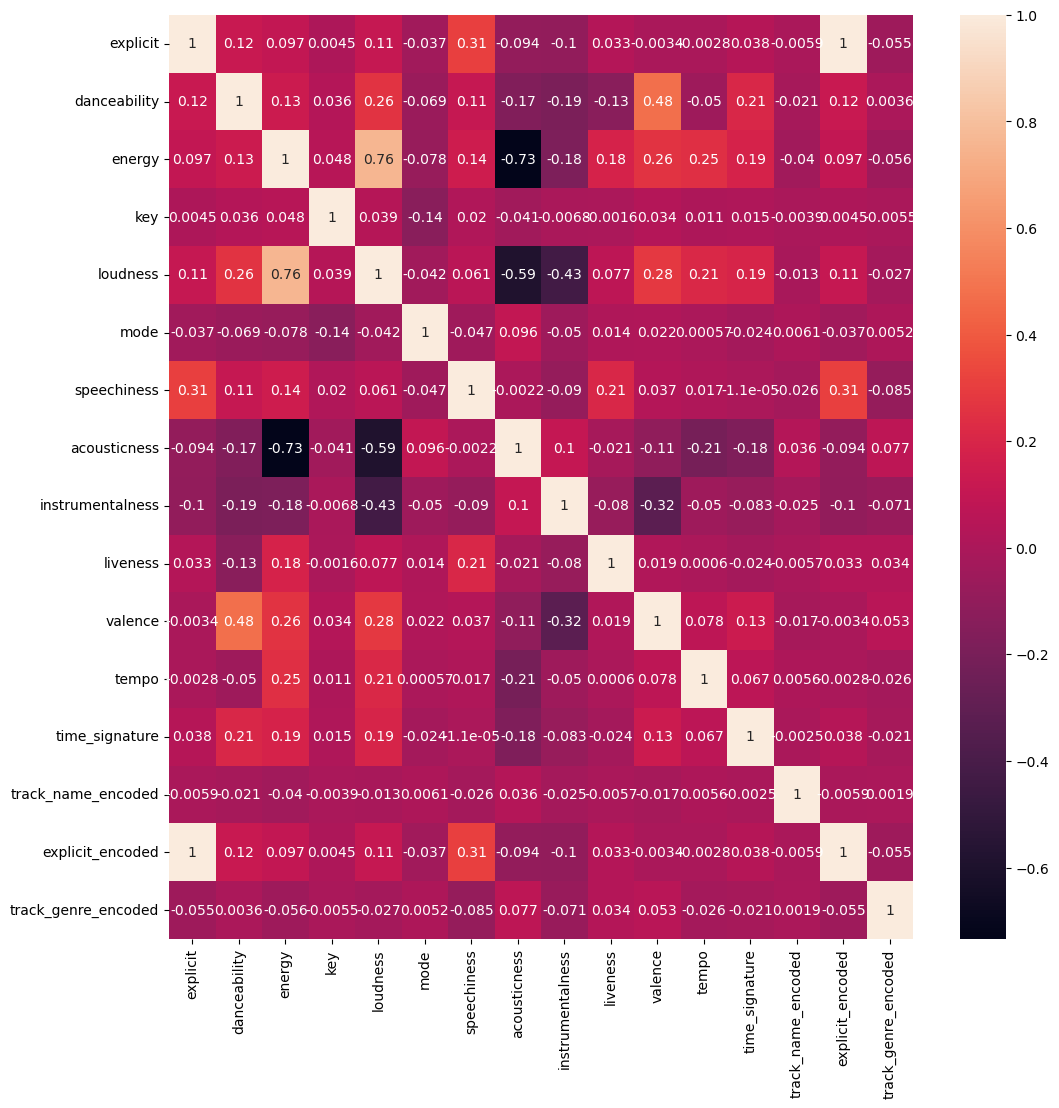

In [119]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True)

In [120]:
df.drop(df.columns[:2], axis=1, inplace=True)
df.drop('track_genre', axis=1, inplace=True)
df.drop('danceability', axis=1, inplace=True)
df.drop('key', axis=1, inplace=True)
df.drop('mode', axis=1, inplace=True)


In [121]:
df.head(5)

,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_name_encoded,explicit_encoded,track_genre_encoded
0,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,11741,0,0
1,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,22528,0,0
2,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,60774,0,0
3,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,9580,0,0
4,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,25689,0,0


In [122]:
x = df.drop('track_genre_encoded',axis = 1)
y = df['track_genre_encoded']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)



In [123]:
print(x_train)

        energy  loudness  speechiness  acousticness  instrumentalness  \
1953     0.809    -5.360       0.0480      0.214000          0.000000   
72867    0.986    -1.759       0.1510      0.001240          0.000064   
9495     0.568    -8.402       0.0290      0.071900          0.000000   
14636    0.517    -8.480       0.0480      0.502000          0.000023   
69660    0.922    -7.078       0.0586      0.217000          0.000003   
...        ...       ...          ...           ...               ...   
44566    0.974    -3.708       0.1420      0.008530          0.000000   
95816    0.733    -5.002       0.0408      0.333000          0.000603   
72173    0.971    -3.118       0.1420      0.000456          0.000000   
100879   0.919    -3.366       0.0389      0.012900          0.000000   
89256    0.606    -8.871       0.0872      0.094600          0.000000   

        liveness  valence    tempo  time_signature  track_name_encoded  \
1953      0.0631    0.873  101.066               

In [124]:
print(y_train)

1953        1
72867      72
9495        9
14636      14
69660      69
         ... 
44566      44
95816      95
72173      72
100879    100
89256      89
Name: track_genre_encoded, Length: 91200, dtype: int32


In [125]:
from sklearn import svm
from sklearn.metrics import accuracy_score


In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [130]:
x_train_prediction=knn_classifier.predict(x_train_scaled)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print(training_data_accuracy)

0.36969298245614035


In [131]:
x_test_prediction=knn_classifier.predict(x_test_scaled)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print(test_data_accuracy)

0.15263157894736842
